# Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

# Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('bank-additional-full.csv')
df.head(3)

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."


In [53]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.888443797038116

In [18]:
df = pd.read_csv('bank-additional-full.csv', delimiter = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
element = df.iloc[0, :]
element
df.columns = element
df

,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df.drop(0)

,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [19]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
df = df.drop(0)
df = df.reset_index(drop=True)
df

,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
0,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41184,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [20]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [21]:
zzl = df[['marital','contact']]
zzl

,marital,contact
0,married,telephone
1,married,telephone
2,married,telephone
3,married,telephone
4,married,telephone
...,...,...
41183,married,cellular
41184,married,cellular
41185,married,cellular
41186,married,cellular


In [22]:
df.drop(columns=zzl,axis=1,inplace=True)

In [23]:
df

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,high.school,unknown,no,no,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,professional.course,no,yes,no,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,professional.course,no,no,no,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,university.degree,no,yes,no,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,professional.course,no,no,no,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [24]:
for i in df.columns:
    if len(df[i].unique()) == 1:
        print(i)


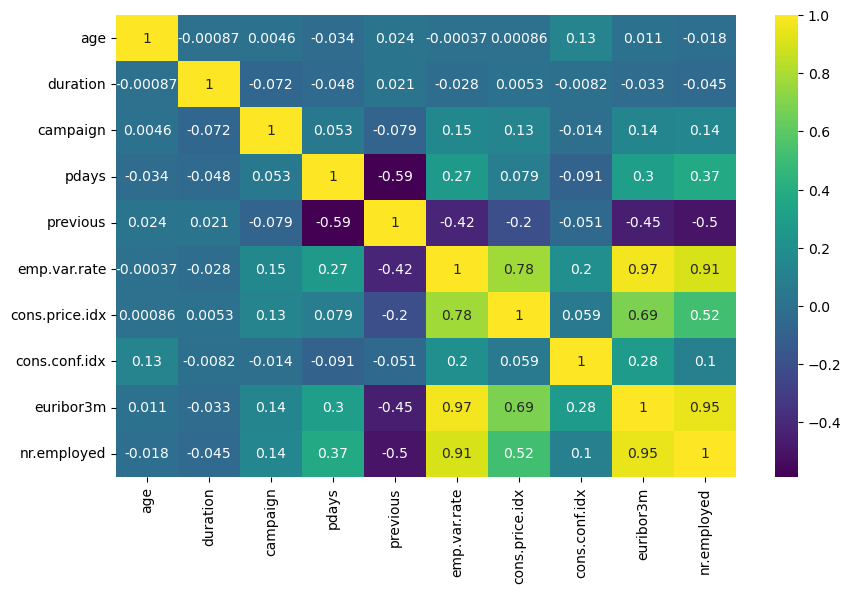

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your data processing and analysis code here
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.show()


# On the above Correlation heatmap contains only int and float categorical column

* ['job', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']
* These are the object categorical features so, where it excluded from an above corr heatmap
* Thus, we required to convert object categorical to int category feature by using Label Enconder

In [26]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['job', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']

label_encoder = LabelEncoder()

for i in categorical_columns:
    df[i] = label_encoder.fit_transform(df[i])

df.head(4)

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,0,0,0,0,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,3,1,0,0,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,3,0,2,0,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,0,0,0,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


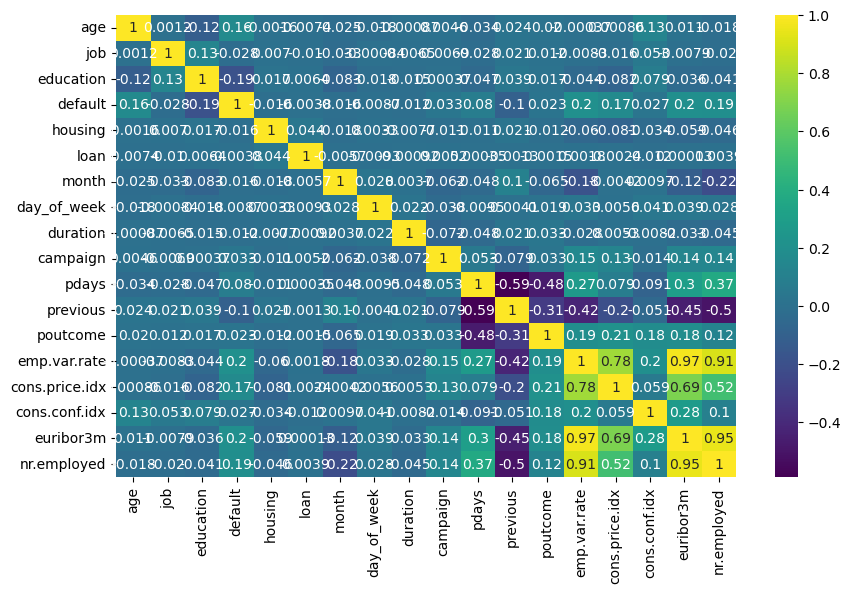

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.show()

In [28]:
df.head(3)

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,0,0,0,0,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,3,1,0,0,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,3,0,2,0,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
df.columns

Index(['age', 'job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   education       41188 non-null  int32  
 3   default         41188 non-null  int32  
 4   housing         41188 non-null  int32  
 5   loan            41188 non-null  int32  
 6   month           41188 non-null  int32  
 7   day_of_week     41188 non-null  int32  
 8   duration        41188 non-null  int64  
 9   campaign        41188 non-null  int64  
 10  pdays           41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  int32  
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

In [31]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [32]:
df.head(41187)

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,0,0,0,0,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,3,1,0,0,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,3,0,2,0,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,0,0,0,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,3,0,0,2,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,29,10,0,0,2,0,7,0,112,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,5,5,0,2,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1,5,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5,6,0,2,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no


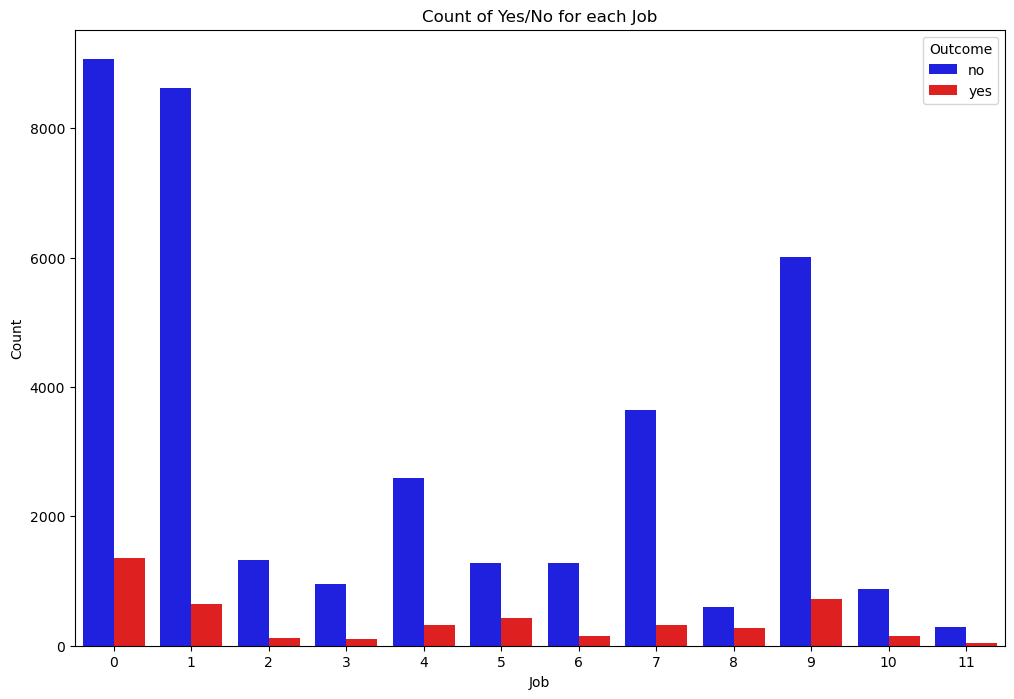

In [33]:
import seaborn as sns

# Define colors for 'yes' and 'no' categories
bar_colors = ['blue', 'red']

# Use seaborn's countplot to create the grouped bar chart
plt.figure(figsize=(12, 8))
sns.countplot(x='job', hue='y', data=df, palette=bar_colors)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Count of Yes/No for each Job')
plt.legend(title='Outcome')
plt.show()


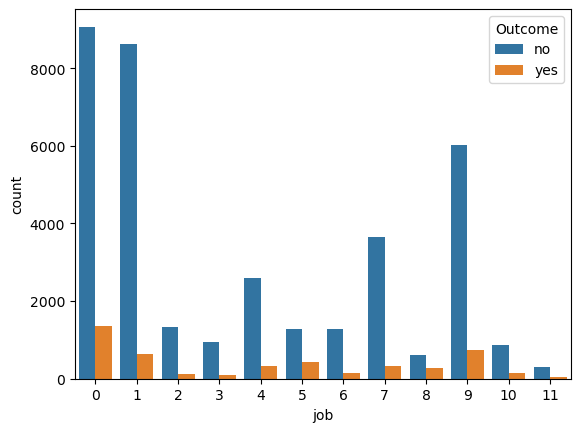

In [34]:

sns.countplot(x='job', hue='y', data=df)
plt.legend(title='Outcome')

In [35]:
# Filter the DataFrame to include only rows where job is 0
job_0_df = df[df['job'] == 0]

# Count the occurrences of 'no' in the 'y' column
no_count = job_0_df['y'].value_counts().get('no', 0)

print(f'Total count of "no" for job category 0: {no_count}')


Total count of "no" for job category 0: 9070


In [36]:
# Filter the DataFrame to include only rows where job is 0
job_0_df = df[df['job'] == 0]

# Count the occurrences of 'no' and 'yes' in the 'y' column
counts = job_0_df['y'].value_counts()

print(f'Total count of "no" for job category 0: {counts.get("no", 0)}')
print(f'Total count of "yes" for job category 0: {counts.get("yes", 0)}')


Total count of "no" for job category 0: 9070
Total count of "yes" for job category 0: 1352


In [37]:
X = df['job']
y = df['campaign']

In [38]:
X

0        3
1        7
2        7
3        0
4        7
        ..
41183    5
41184    1
41185    5
41186    9
41187    5
Name: job, Length: 41188, dtype: int32

In [39]:
y

0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    2
41186    1
41187    3
Name: campaign, Length: 41188, dtype: int64

In [40]:
X = df.drop('y', axis=1)
y = df['y']

In [41]:
X

'''Splited the dataset into X and y it contains all features except 'y' which it moves to y variable'''

"Splited the dataset into X and y it contains all features except 'y' which it moves to y variable"

In [42]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

In [46]:
# Train the classifier
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Accuracy Score

In [48]:
accuracy = accuracy_score(y_test, y_pred)

In [49]:
print(f'Accuracy : {accuracy}')

Accuracy : 0.888443797038116


# Classification Report

In [50]:
classification_rep = classification_report(y_test, y_pred)

In [51]:
print('Classifiation Report :\n')
print(classification_rep)

Classifiation Report :

              precision    recall  f1-score   support

          no       0.94      0.93      0.94      7303
         yes       0.51      0.54      0.52       935

    accuracy                           0.89      8238
   macro avg       0.72      0.74      0.73      8238
weighted avg       0.89      0.89      0.89      8238

